In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load dataset
data=pd.read_csv('ford.csv')

In [3]:
# basic cheks
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [4]:
data.tail()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,8299,Manual,5007,Petrol,145,57.7,1.2
17965,Focus,2015,8299,Manual,5007,Petrol,22,57.7,1.0


In [5]:
data.shape

(17966, 9)

In [6]:
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


Insights-
1--minimum year is 2018 and maximum is 2060 which is outlier here.
2--minimum car sell price is 495 and maximum is 54995.
3--minimum milege is 1.
4--minimum enginSize is 0 which is outlier.

In [7]:
data.describe(include='O')

,model,transmission,fuelType
count,17966,17966,17966
unique,24,3,5
top,Fiesta,Manual,Petrol
freq,6557,15518,12179


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [9]:
data.model.groupby(by=data.year).sum()

year
1996                                               Escort
1998                                               Fiesta
2000                                               Fiesta
2002                                     Mondeo Puma Puma
2003                                    Focus Focus Focus
2004                          Fiesta Fiesta Fiesta Fusion
2005     Fusion Mondeo Streetka Focus Mondeo Fiesta Fo...
2006     Focus Fiesta KA S-MAX S-MAX Fiesta Fusion Fie...
2007     Galaxy Focus Focus Mondeo Fiesta Fiesta Fiest...
2008     C-MAX Fiesta Fiesta Focus Fiesta Focus C-MAX ...
2009     Fiesta Mondeo Kuga Fiesta Fiesta Focus Fiesta...
2010     Fusion Fiesta Focus Fiesta Focus Fiesta Fiest...
2011     Focus Fiesta Fiesta Focus Mondeo Fiesta Fiest...
2012     Fiesta Fiesta Fiesta B-MAX B-MAX Focus Mondeo...
2013     Fiesta Fiesta Fiesta Fiesta Fiesta C-MAX B-MA...
2014     Kuga Fiesta B-MAX Fiesta Fiesta B-MAX Focus F...
2015     Fiesta Fiesta Focus Fiesta Fiesta Kuga Tourne...
2016     

In [10]:
data.loc[data.year==2020]['model'].unique()

array([' EcoSport', ' Puma', ' S-MAX', ' Fiesta', ' Mustang', ' Focus',
       ' Kuga', ' Mondeo', ' Grand Tourneo Connect', ' Tourneo Connect',
       ' Ka+'], dtype=object)

In [11]:
data.loc[data.year==1996]['model'].unique()

array([' Escort'], dtype=object)

In [12]:
data.fuelType.value_counts()

fuelType
Petrol      12179
Diesel       5762
Hybrid         22
Electric        2
Other           1
Name: count, dtype: int64

# domail analysis-
1.model - > Ford Car Brands
2.year - >Production Year
3.price - >Price of car in $
4.transmission - > Automatic,Manual, Semi-Auto
5.mileage -> Number of miles traveled
6.fuel_Type -> Petrol,Diesel,Hybrid,Electric,Other
7.tax -> Annual Tax
8.mpg - > Miles per Gallon
9.engineSize - > Car's Engine Size

In [13]:
## EDA

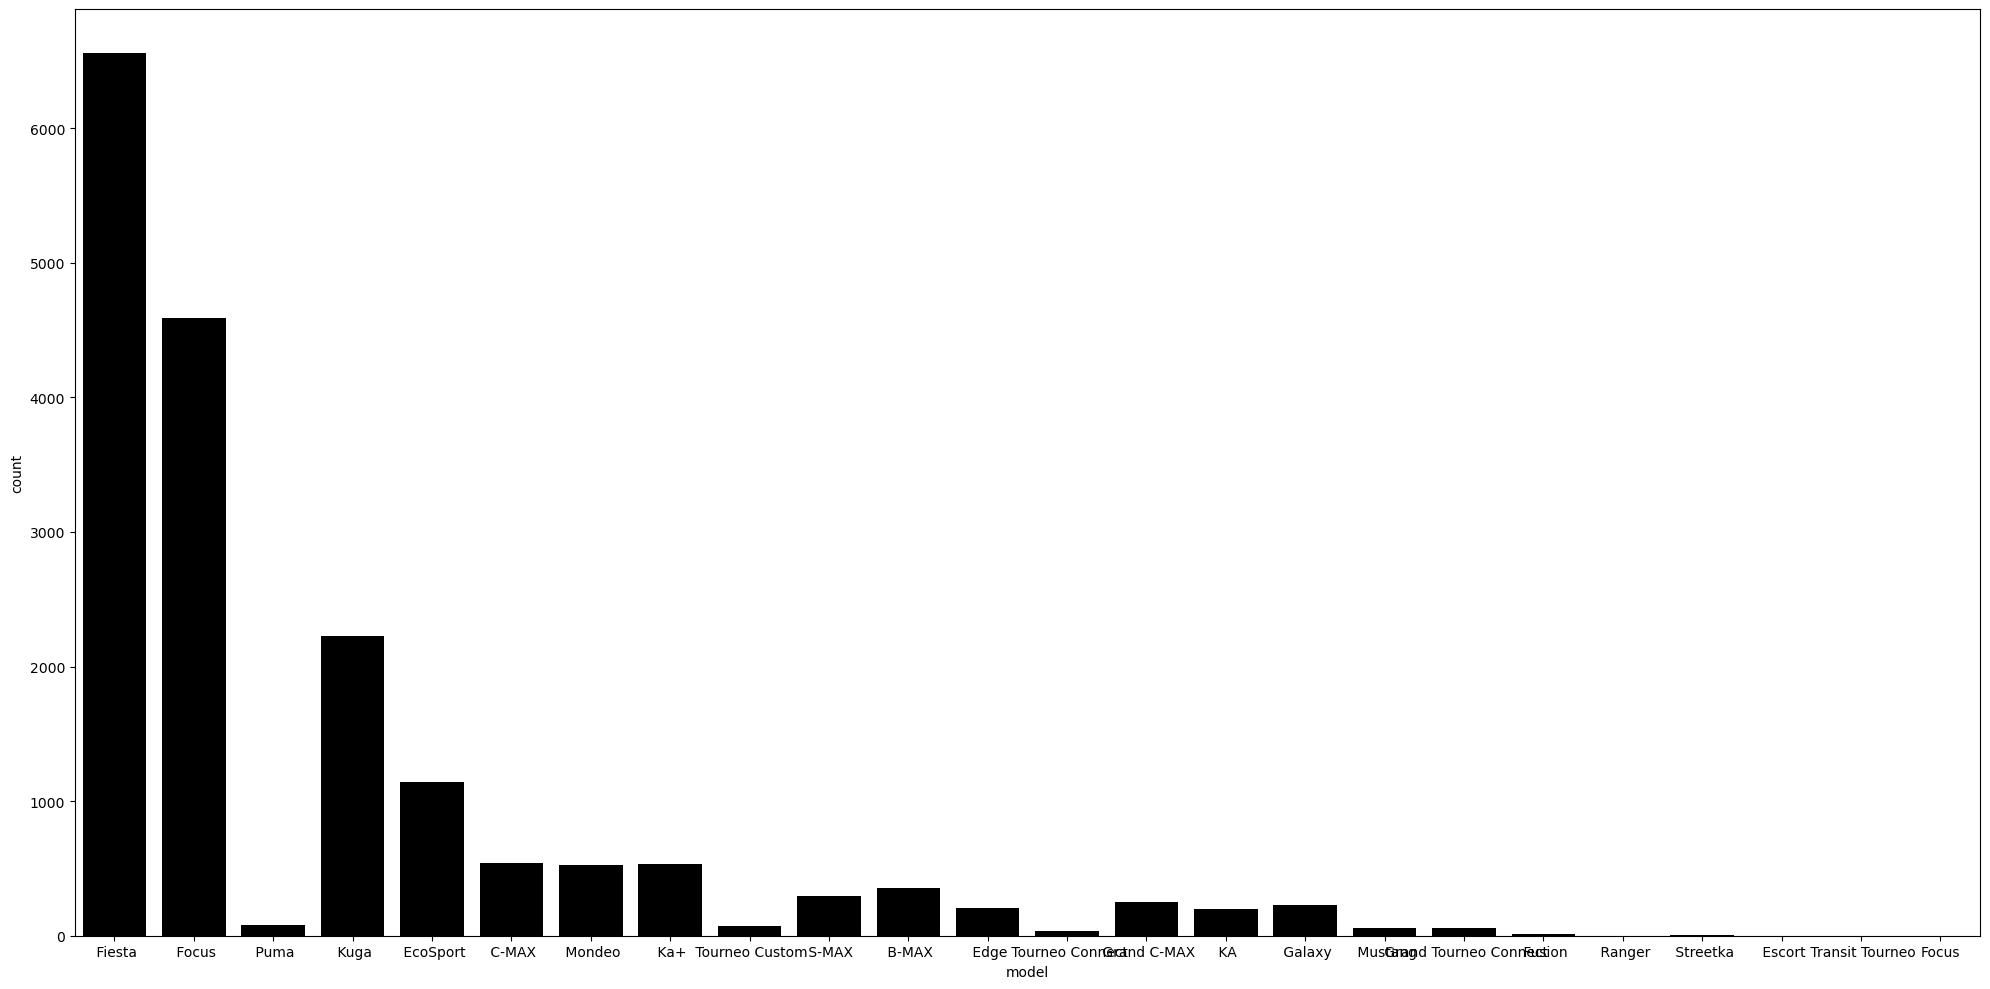

In [14]:
# univariate analysis
plt.figure(figsize=(20,10),facecolor='white')
sns.countplot(x=data.model,color='black')
plt.tight_layout()

Insigths-
1--fiesta is maximum selled car that means it is common in socity.

<Axes: xlabel='transmission', ylabel='count'>

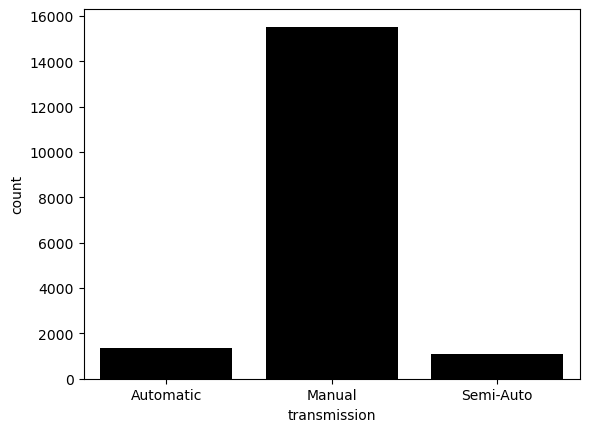

In [15]:
sns.countplot(x=data.transmission,color='black')

Insights-
1--There are manual transmision cars are more then semi_Auto and Automatic are low popular in this era.

<Axes: xlabel='fuelType', ylabel='count'>

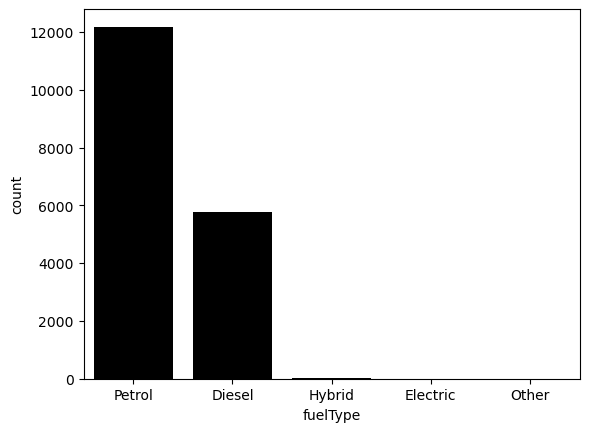

In [16]:
sns.countplot(x=data.fuelType,color='black')

Insights--
1--Petrol cars count is more as compare to diesel and hybrid cars.

<Axes: xlabel='engineSize', ylabel='count'>

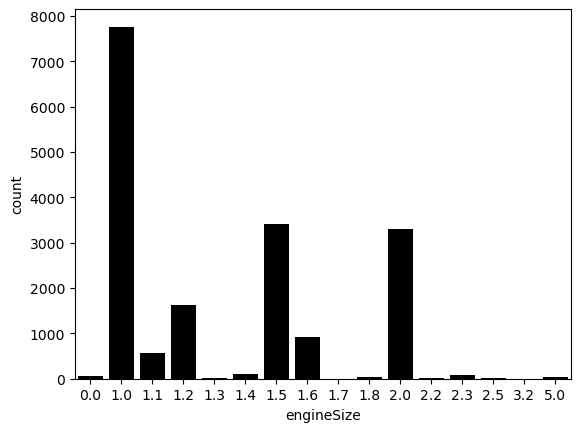

In [17]:
sns.countplot(x=data.engineSize,color='black')

Insiights-
1-- engine size is one are more popular and 5.0 engine size are rare cars.
2-- 0.0 is outlier we see that very clearly.

<Axes: xlabel='year', ylabel='price'>

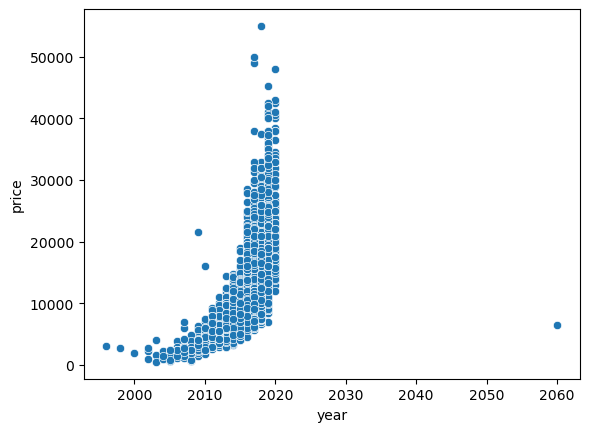

In [18]:
# bivariet grap
sns.scatterplot(x='year',y='price',data=data)

Insights-
1--year have positive correlation with price means car is new then price is also greater.

<Axes: xlabel='mileage', ylabel='price'>

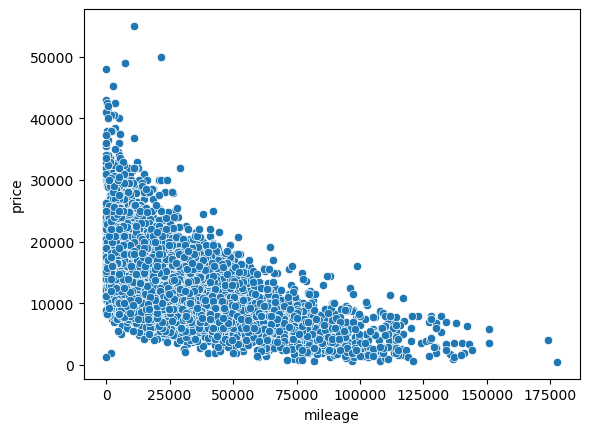

In [19]:
sns.scatterplot(y='price',x='mileage',data=data)

Insights-
1--mileage is neagativly correlated that is mileage increases price decreases.

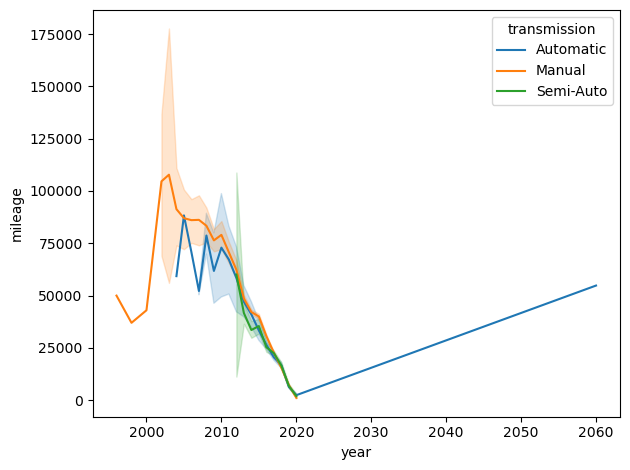

In [20]:
sns.lineplot(x='year',y='mileage',data=data,hue='transmission')
plt.tight_layout()

Insights-
1--We see clearly that manual old car has greater mileage.

<Axes: xlabel='year', ylabel='price'>

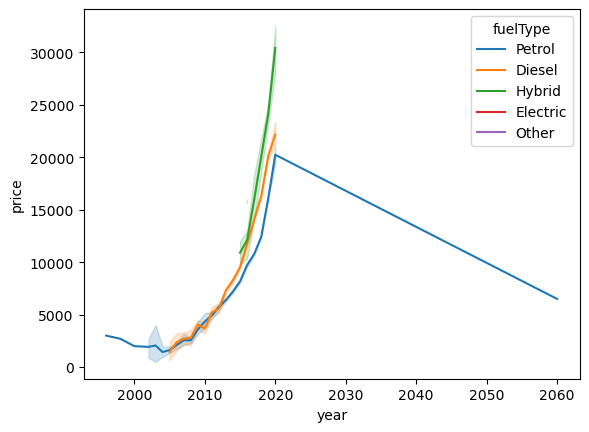

In [21]:
sns.lineplot(x='year',y='price',data=data,hue='fuelType')

Insights-
1--Hybride cars get more price because it has electric as well as mannual engine.

In [22]:
# multivariate analysis
num_col=data.select_dtypes(include='int')

In [23]:
num_col

,year,price,mileage,tax
0,2017,12000,15944,150
1,2018,14000,9083,150
2,2017,13000,12456,150
3,2019,17500,10460,145
4,2019,16500,1482,145
...,...,...,...,...
17961,2017,8999,16700,150
17962,2014,7499,40700,30
17963,2015,9999,7010,20
17964,2018,8299,5007,145


<Axes: >

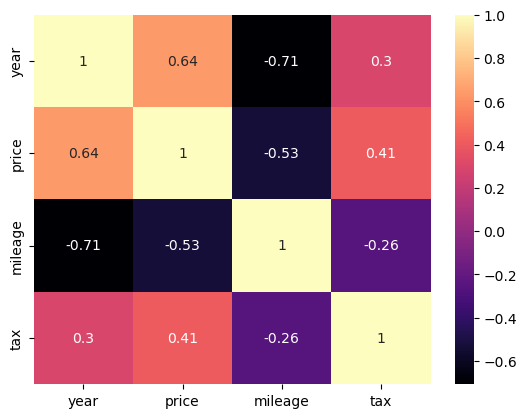

In [24]:
sns.heatmap(num_col.corr(),annot=True,cmap='magma')

Insigths-
1--There is no high correlation between all features.

In [25]:
# top 5 avg price
avg_price=data.price.groupby(by=data.year).mean()

Text(0.5, 1.0, 'top 5 avg price')

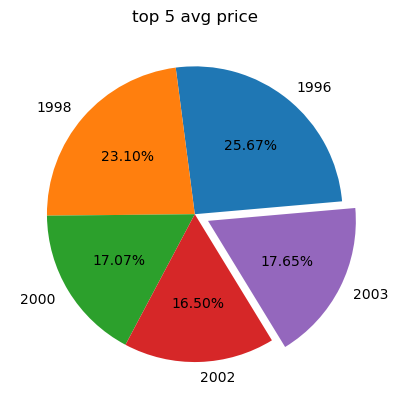

In [26]:
plt.pie(avg_price[:5],autopct='%1.2f%%',startangle=5,labels=avg_price.index[:5],explode=[0,0,0,0,0.1])
plt.title('top 5 avg price')

Insights-
1--1998 cars are more selled and also get more price.
2--From above pie chart we can say that up to 2003 cars get selled more so they get more avg price.

In [27]:
# preprocessing
data.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [28]:
data.duplicated().sum()

154

In [29]:
data.drop_duplicates(keep='first')

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,8299,Manual,5007,Petrol,145,57.7,1.2


In [30]:
num_col=data.select_dtypes(include=['int','float'])

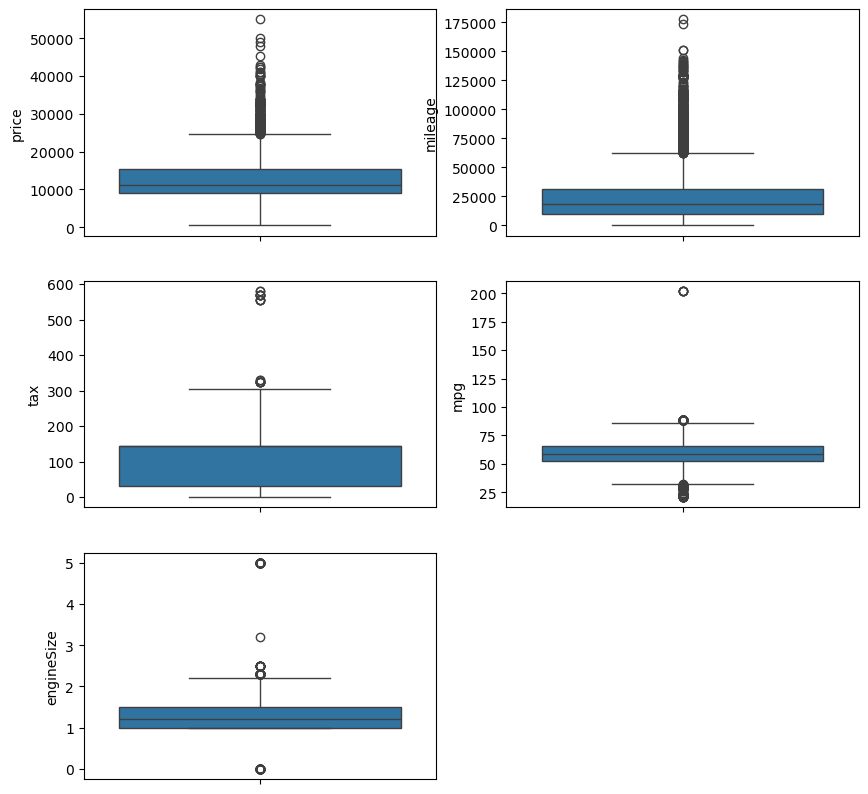

In [31]:
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for i in num_col.drop(['year'],axis=1):
    if plotnumber<=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.boxplot(num_col[i])
    plotnumber+=1

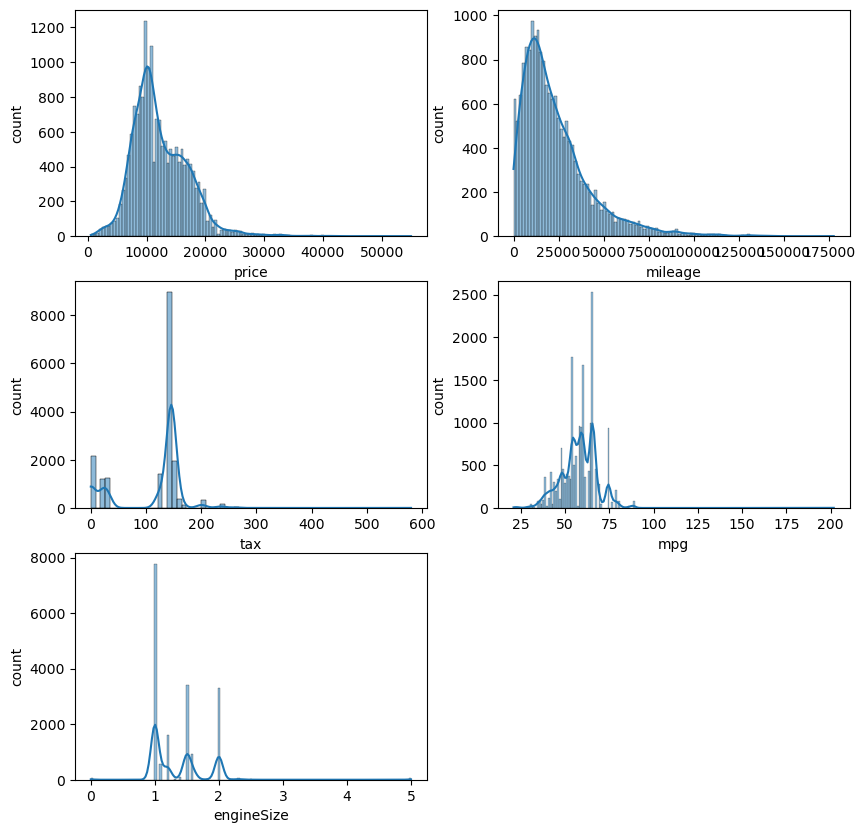

In [32]:
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for i in num_col.drop(['year'],axis=1):
    if plotnumber<=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.histplot(num_col[i],kde=True)
        plt.xlabel(i)
        plt.ylabel('count')
    plotnumber+=1

In [33]:
# it seems like all the data above is skewed hence we use IQR method
q1=data.price.quantile(0.25)
q3=data.price.quantile(0.75)
IQR=q3-q1
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR
print(upper_limit)
print(lower_limit)

24749.0
-451.0


In [34]:
data.loc[data['price']>upper_limit]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
8,Kuga,2019,25500,Automatic,6894,Diesel,145,42.2,2.0
91,Focus,2016,24995,Manual,7997,Petrol,235,36.7,2.3
230,S-MAX,2020,34498,Semi-Auto,4623,Diesel,145,43.5,2.0
302,Mustang,2020,42489,Automatic,3500,Petrol,145,22.1,5.0
339,Mustang,2020,38489,Automatic,3500,Petrol,145,30.7,2.3
...,...,...,...,...,...,...,...,...,...
17838,S-MAX,2020,30000,Automatic,1000,Diesel,145,43.5,2.0
17866,Mustang,2020,48000,Manual,50,Petrol,145,23.9,5.0
17868,Kuga,2020,25050,Manual,50,Diesel,145,38.2,2.0
17890,Edge,2018,25999,Automatic,19458,Diesel,145,47.9,2.0


In [35]:
data.loc[data['price']<lower_limit]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


In [36]:
data.loc[data['price']>upper_limit,'price']=data.price.median()

In [37]:
data.loc[data['price']>upper_limit]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


In [38]:
q1=data.mileage.quantile(0.25)
q3=data.mileage.quantile(0.75)
IQR=q3-q1
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR

In [39]:
data.loc[data['mileage']>upper_limit]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
76,Fiesta,2013,4790,Manual,74128,Petrol,0,65.7,1.0
254,Fiesta,2013,4998,Manual,79300,Petrol,0,65.7,1.0
288,Fiesta,2014,4699,Manual,85000,Petrol,30,54.3,1.2
299,Kuga,2013,8998,Manual,67895,Diesel,200,47.9,2.0
344,Focus,2015,7994,Manual,64612,Diesel,20,67.3,1.6
...,...,...,...,...,...,...,...,...,...
17780,Fiesta,2012,5500,Manual,64068,Petrol,150,48.7,1.4
17785,Fiesta,2012,5500,Manual,64068,Diesel,125,51.4,1.4
17835,Focus,2015,7500,Manual,67107,Diesel,0,74.3,1.5
17906,Kuga,2017,15499,Semi-Auto,64315,Diesel,145,54.3,2.0


In [40]:
data.loc[data.mileage<lower_limit]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


In [41]:
data.loc[data['mileage']>upper_limit,'mileage']=data.mileage.median()
data.loc[data['mileage']>upper_limit]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


In [42]:
q1=data.tax.quantile(0.25)
q3=data.tax.quantile(0.75)
IQR=q3-q1
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR

In [43]:
data.loc[data['tax']>upper_limit]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
364,Mustang,2016,11291,Semi-Auto,42086.0,Petrol,570,23.5,5.0
3163,Mustang,2017,11291,Semi-Auto,26452.0,Petrol,580,23.5,5.0
3395,Mustang,2017,11291,Semi-Auto,23179.0,Petrol,570,23.5,5.0
3687,Mustang,2016,11291,Manual,12000.0,Petrol,570,20.9,5.0
6136,Mustang,2016,11291,Semi-Auto,26104.0,Petrol,570,20.8,5.0
9790,Mustang,2016,11291,Automatic,18500.0,Petrol,570,23.5,5.0
11097,Mustang,2016,11291,Manual,11600.0,Petrol,580,20.9,5.0
12400,Mustang,2017,11291,Semi-Auto,8470.0,Petrol,570,23.5,5.0
13741,Kuga,2012,9490,Automatic,56384.0,Petrol,555,27.4,2.5
13826,Mustang,2016,11291,Automatic,18000.0,Petrol,325,28.8,2.3


In [44]:
data.loc[data.tax>upper_limit,'tax']=data.tax.median()
data.loc[data.tax>upper_limit]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


In [45]:
q1=data.mpg.quantile(0.25)
q3=data.mpg.quantile(0.75)
IQR=q3-q1
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR
print(upper_limit)
print(lower_limit)

85.80000000000001
32.19999999999999


In [46]:
data.loc[data.mpg>upper_limit]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
744,Fiesta,2016,7498,Manual,41271.0,Diesel,0,88.3,1.5
993,Fiesta,2016,7000,Manual,18242.5,Diesel,0,88.3,1.5
1031,Fiesta,2018,13495,Manual,14000.0,Diesel,145,88.3,1.5
1122,Fiesta,2016,8498,Manual,39271.0,Diesel,0,88.3,1.5
1683,Fiesta,2018,8991,Manual,30500.0,Diesel,145,88.3,1.5
...,...,...,...,...,...,...,...,...,...
16872,Fiesta,2016,7695,Manual,43680.0,Diesel,0,88.3,1.5
16961,Fiesta,2018,10600,Manual,14861.0,Diesel,145,88.3,1.5
17043,Fiesta,2017,6795,Manual,18242.5,Diesel,0,88.3,1.5
17510,Fiesta,2018,9100,Manual,55717.0,Diesel,145,88.3,1.5


In [47]:
data.loc[data.mpg<lower_limit]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
55,Tourneo Custom,2018,19995,Automatic,24568.0,Diesel,145,31.7,2.0
200,Kuga,2019,21498,Automatic,5354.0,Petrol,150,31.0,1.5
302,Mustang,2020,11291,Automatic,3500.0,Petrol,145,22.1,5.0
339,Mustang,2020,11291,Automatic,3500.0,Petrol,145,30.7,2.3
353,Mustang,2018,11291,Automatic,3000.0,Petrol,145,28.8,2.3
...,...,...,...,...,...,...,...,...,...
17316,Kuga,2011,7499,Manual,56000.0,Petrol,145,28.5,2.5
17430,S-MAX,2008,4890,Automatic,18242.5,Petrol,145,29.1,2.3
17441,Mondeo,2008,3890,Automatic,18242.5,Petrol,145,30.4,2.3
17866,Mustang,2020,11291,Manual,50.0,Petrol,145,23.9,5.0


In [48]:
data.loc[data.mpg>upper_limit,'mpg']=data.mpg.median()
data.loc[data.mpg<lower_limit,'mpg']=data.mpg.median()

In [49]:
data.loc[data.mpg<lower_limit]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


In [50]:
q1=data.engineSize.quantile(0.25)
q3=data.engineSize.quantile(0.75)
IQR=q3-q1
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR

In [51]:
data.loc[data.engineSize<lower_limit,'engineSize']=data.engineSize.median()
data.loc[data.engineSize>upper_limit,'engineSize']=data.engineSize.median()

In [52]:
# label encoding
data.model.value_counts()

model
 Fiesta                   6557
 Focus                    4588
 Kuga                     2225
 EcoSport                 1143
 C-MAX                     543
 Ka+                       531
 Mondeo                    526
 B-MAX                     355
 S-MAX                     296
 Grand C-MAX               247
 Galaxy                    228
 Edge                      208
 KA                        199
 Puma                       80
 Tourneo Custom             69
 Grand Tourneo Connect      59
 Mustang                    57
 Tourneo Connect            33
 Fusion                     16
 Streetka                    2
 Ranger                      1
 Escort                      1
 Transit Tourneo             1
Focus                        1
Name: count, dtype: int64

In [53]:
data.model=data.model.map({' Fiesta':23, ' Focus':22, ' Kuga':21, ' EcoSport':20, ' C-MAX':19, ' Ka+':18, ' Mondeo':17,' B-MAX':16, ' S-MAX':15, ' Grand C-MAX':14, ' Galaxy':13, ' Edge':12, ' KA':11, ' Puma':10,' Tourneo Custom':9, ' Grand Tourneo Connect':8, ' Mustang':7,' Tourneo Connect':6, ' Fusion':5, ' Streetka':4, ' Ranger':3, ' Escort':2,' Transit Tourneo':1, 'Focus':0})

In [54]:
data.transmission=data.transmission.map({'Manual':2,'Automatic':1,'Semi-Auto':0})

In [55]:
data.fuelType=data.fuelType.map({'Petrol':4, 'Diesel':3, 'Hybrid':2, 'Electric':1, 'Other':0})

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  int64  
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  int64  
 4   mileage       17966 non-null  float64
 5   fuelType      17966 non-null  int64  
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(3), int64(6)
memory usage: 1.2 MB


## Evalution of models

In [57]:
# model selection and evalution of data
x=data.drop('price',axis=1)
y=data.price
from sklearn.preprocessing import MinMaxScaler
mn=MinMaxScaler()
x[['model','year','transmission','mileage','fuelType','tax','mpg','engineSize']]=mn.fit_transform(x)

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=45)

In [59]:
x

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,1.000000,0.328125,0.5,0.254424,1.00,0.491803,0.474576,0.000000
1,0.956522,0.343750,1.0,0.144934,1.00,0.491803,0.474576,0.000000
2,0.956522,0.328125,1.0,0.198762,1.00,0.491803,0.474576,0.000000
3,1.000000,0.359375,1.0,0.166909,1.00,0.475410,0.146893,0.416667
4,1.000000,0.359375,0.5,0.023634,1.00,0.475410,0.305085,0.000000
...,...,...,...,...,...,...,...,...
17961,0.695652,0.328125,1.0,0.266489,1.00,0.491803,0.274953,0.333333
17962,0.695652,0.281250,1.0,0.649490,1.00,0.098361,0.474576,0.000000
17963,0.956522,0.296875,1.0,0.111852,0.75,0.065574,0.655367,0.500000
17964,0.478261,0.343750,1.0,0.079888,1.00,0.475410,0.474576,0.166667


In [60]:
x_test.shape

(3594, 8)

## Linear Regression

In [101]:
# linear regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
lr_prediction=lr.predict(x_test)

In [102]:
lr_prediction

array([10968.79864064, 11992.81150888, 12245.62114188, ...,
       15955.69288604, 15158.32001878, 18371.67405399])

In [103]:
y_test

4179      8000
6746     10495
6606     11200
11112    17999
16658     1995
         ...  
9164     20000
755      14698
12124    23970
3595     13140
4174     20695
Name: price, Length: 3594, dtype: int64

In [106]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [107]:
print(r2_score(y_test,lr_prediction))
print(mean_absolute_error(y_test,lr_prediction))
print(mean_squared_error(y_test,lr_prediction))

0.6159451921837298
1807.0984144275055
6776034.682939914


In [108]:
adjusted_r2=1-(1-0.61)*(3563-1)/(3563-8-1)
print(adjusted_r2)

0.6091221159257174


## KNN

In [109]:
# also we can use Knn
from sklearn.neighbors import KNeighborsRegressor
error_rate=[]
for i in range(1,11):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_predict_knn=knn.predict(x_test)
    error_rate.append(np.mean(y_test!=y_predict_knn))

In [110]:
error_rate

[0.9543683917640512,
 0.9810795770728993,
 0.988313856427379,
 0.9894268224819143,
 0.9902615470228158,
 0.9908180300500835,
 0.9919309961046188,
 0.993322203672788,
 0.9941569282136895,
 0.9947134112409571]

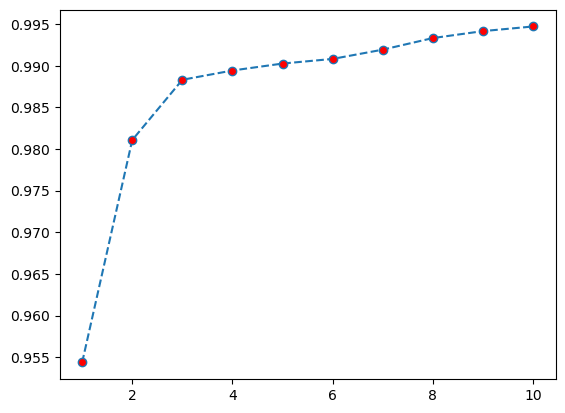

In [111]:
plt.plot(range(1,11),error_rate,linestyle='dashed',marker='o',markerfacecolor='red')

In [112]:
knn=KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train,y_train)
knn_predict=knn.predict(x_test)

In [113]:
print(r2_score(y_test,knn_predict))
print(mean_absolute_error(y_test,knn_predict))
print(mean_squared_error(y_test,knn_predict))

0.8564851040805785
1026.7136894824707
2532091.4944351697


In [114]:
adjusted_r2_score=1-(1-0.85)*(3563-1)/(3563-8-1)
adjusted_r2_score

0.8496623522791221

## Decision Tree

In [78]:
# with decision tree
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt_prediction=dt.predict(x_test)

In [79]:
print(r2_score(y_test,dt_prediction))
print(mean_absolute_error(y_test,dt_prediction))
print(mean_squared_error(y_test,dt_prediction))

0.8280941916321145
1093.7493755703272
3033003.873386915


In [80]:
adjusted_r2_score=(1-(1-0.82)*(3563-1)/(3563-8-1))
adjusted_r2_score

0.8195948227349465

In [81]:
# we use random grid search cv in dt
from sklearn.model_selection import RandomizedSearchCV

In [82]:
params={'criterion':('squared_error','absolute_error'),'splitter':('best','random'),'min_samples_leaf':[2,3,4],'min_samples_split':list(range(1,20)),'max_depth':list(range(1,20))}

In [84]:
dt=DecisionTreeRegressor(random_state=45)
dt_random=RandomizedSearchCV(estimator=dt,param_distributions=params,n_jobs=-1,verbose=1,cv=3,scoring='r2')
dt_random.fit(x_train,y_train)
dt_random_prediction=dt_random.predict(x_test)
dt_random.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


{'splitter': 'best',
 'min_samples_split': 9,
 'min_samples_leaf': 4,
 'max_depth': 17,
 'criterion': 'squared_error'}

In [85]:
dt=DecisionTreeRegressor(splitter='random',min_samples_split=16,min_samples_leaf=2,max_depth=19,criterion='squared_error')
dt.fit(x_train,y_train)
dt_prediction_after=dt.predict(x_test)

In [86]:
print(r2_score(y_test,dt_prediction_after))
print(mean_absolute_error(y_test,dt_prediction_after))
print(mean_squared_error(y_test,dt_prediction_after))

0.8800533276850581
954.8358089983993
2116267.770036866


In [87]:
adjuscent_r2_score=1-(1-0.88)*(3563-1)/(3563-8-1)
print(adjuscent_r2_score)

0.8797298818232977


## Randomized forest

In [91]:
# now with the help of hyperparamete in randomizedsearchcv
from sklearn.model_selection import RandomizedSearchCV

In [92]:
param_distributions={'n_estimators':[int(x) for x in np.linspace(start=200,stop=2000,num=11)],'max_depth':list(range(1,20)),'min_samples_leaf':[2,3,6],'min_samples_split':list(range(2,5)),'max_features':('sqrt','auto'),'bootstrap':[True,False]}

In [115]:
from sklearn.ensemble import RandomForestRegressor
rd=RandomForestRegressor(random_state=45)
rcv=RandomizedSearchCV(estimator=rd,param_distributions=param_distributions,n_iter=50,cv=3,scoring='r2',n_jobs=-1)
rcv.fit(x_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=45),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19],
                                        'max_features': ('sqrt', 'auto'),
                                        'min_samples_leaf': [2, 3, 6],
                                        'min_samples_split': [2, 3, 4],
                                        'n_estimators': [200, 380, 560, 740,
                                                         920, 1100, 1280, 1460,
                                                         1640, 1820, 2000]},
                   scoring='r2')

In [116]:
rcv.best_params_

{'n_estimators': 2000,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 14,
 'bootstrap': False}

In [117]:
rd=RandomForestRegressor(n_estimators=920,min_samples_split=2,min_samples_leaf=2,max_features='sqrt',max_depth=16,bootstrap=False)
rd.fit(x_train,y_train)
rd_prediction=rd.predict(x_test)

In [118]:
print(r2_score(y_test,rd_prediction))
print(mean_absolute_error(y_test,rd_prediction))
print(mean_squared_error(y_test,rd_prediction))

0.9042218277154154
873.6574202022113
1689853.1252847023


In [94]:
adjusted_r2_score=(1-(1-0.90)*(3563-1)/(3563-8-1))
adjusted_r2_score

0.8997749015194147

## Bagging

In [158]:
from sklearn.ensemble import BaggingRegressor

In [165]:
model_bg=BaggingRegressor(base_estimator=rd,n_estimators=21)
model_bg.fit(x_train,y_train)
model_bg_prediction=model_bg.predict(x_test)

In [167]:
print(r2_score(y_test,model_bg_prediction))
print(mean_absolute_error(y_test,model_bg_prediction))
print(mean_squared_error(y_test,model_bg_prediction))

0.9041805477064424
883.8055063820415
1690581.4452193044


In [96]:
adjuste_r2_score=(1-(1-0.90)*(1-3563))/(3563-8-1)
adjusted_r2_score

0.8997749015194147

## XGB

In [61]:
from xgboost import XGBRegressor
xgb_r=XGBRegressor()
xgb_r.fit(x_train,y_train)
xgb_r_prediction=xgb_r.predict(x_test)

In [66]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print(r2_score(y_test,xgb_r_prediction))
print(mean_absolute_error(y_test,xgb_r_prediction))
print(mean_squared_error(y_test,xgb_r_prediction))

0.9060005325048504
866.790131430395
1658470.7155384123


In [97]:
adjuste_r2_score=(1-(1-0.90)*(1-3563))/(3563-8-1)
adjusted_r2_score

0.8997749015194147

In [67]:
param_grid={'gamma':[0,0.1,0.2,0.4,0.8,1.6,12.8,6.51,102.3,200],'learning_rate':[0.01,0,15,0,24,0.03,0.06,0.2,0.1,0.25,0.33,0.4,0.5],'max_depth':[5,6,7,8,9,11,12,14,16,17,23],'n_estimators':[50,65,80,100,115,64,22,130,150],'reg_alpha':[0,0.1,0.2,0.4,0.8,1.6,3.2,2.6,4.12,6.51],'reg_lambda':[0,0.1,0.2,0.4,0.8,1.6,3.2,2.6,4.12,6.51]}
XGB=XGBRegressor(random_state=42,verbosity=2)
from sklearn.model_selection import RandomizedSearchCV
rcv=RandomizedSearchCV(estimator=XGB,scoring='r2',param_distributions=param_grid,n_iter=50,cv=5,verbose=2,random_state=42,n_jobs=-1)
rcv.fit(x_train,y_train)
rcv.best_params_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


{'reg_lambda': 6.51,
 'reg_alpha': 3.2,
 'n_estimators': 100,
 'max_depth': 5,
 'learning_rate': 0.2,
 'gamma': 0.2}

In [68]:
XGB1=XGBRegressor(reg_lambda=6.51,reg_alpha=3.2,n_estimators=100,max_depth=5,learning_rate=0.2,gamma=0.2)
XGB1.fit(x_train,y_train)
XGB1_prediction=XGB1.predict(x_test)

In [69]:
print(r2_score(y_test,XGB1_prediction))
print(mean_absolute_error(y_test,XGB1_prediction))
print(mean_squared_error(y_test,XGB1_prediction))

0.904165281550535
882.4245897398171
1690850.7921973893


In [98]:
adjuste_r2_score=(1-(1-0.90)*(1-3563))/(3563-8-1)
adjusted_r2_score

0.8997749015194147

## model comaperison

In [120]:
df=pd.DataFrame()
df['Model']=['LinearRegression','KNeighborsRegressor','DecisionTreeRegressor','DecisionTreeRegressor_cv','RandomForestRegressor_cv','BaggingRegressor','XGBRegressor','XGBRegressor_cv']
df['r2_score']=[0.6159451921837298,0.8564851040805785,0.8280941916321145,0.8800533276850581,0.8800533276850581,0.9041805477064424,0.9060005325048504,0.904165281550535,]
df['MAE']=[1807.0984144275055,1026.7136894824707,1093.7493755703272,954.8358089983993,954.8358089983993,883.8055063820415,866.790131430395,882.4245897398171,]
df['MSE']=[6776034.682939914,2532091.4944351697,3033003.873386915,2116267.770036866,2116267.770036866,1690581.4452193044,1658470.7155384123,1690850.7921973893]

Text(0, 0.5, 'MAE')

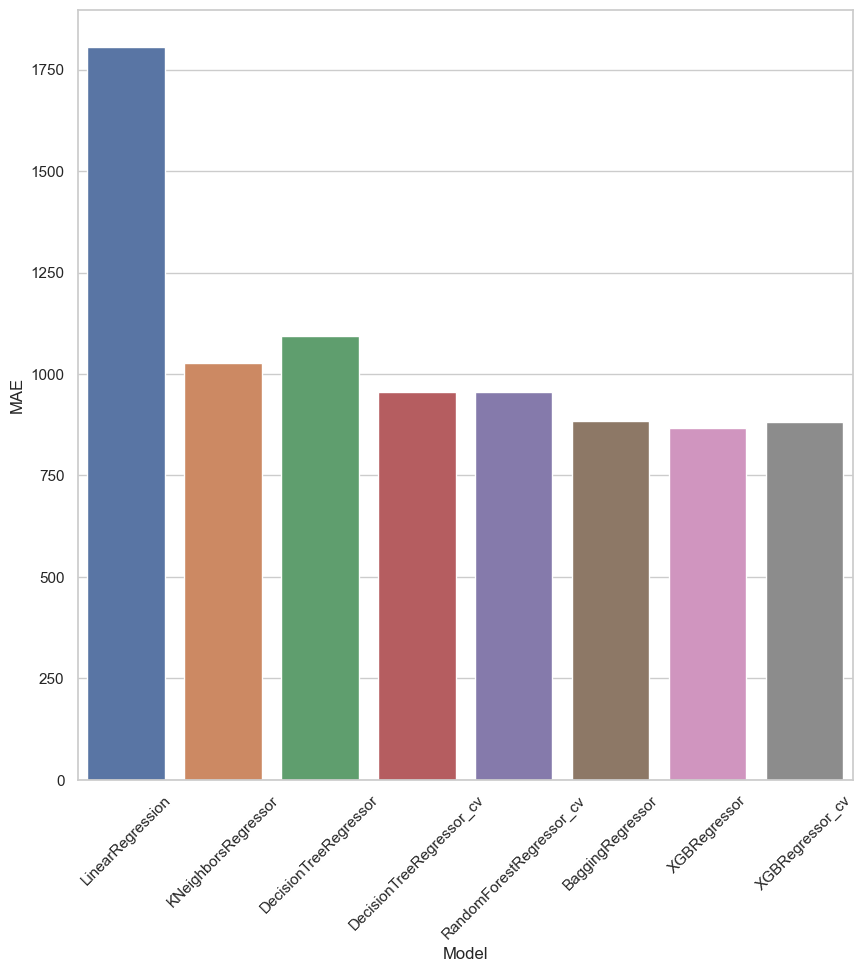

In [137]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=45)
sns.set(style='whitegrid')
sns.barplot(x='Model',y='MAE',data=df,hue='Model')
plt.xlabel('Model')
plt.ylabel('MAE')

Insights-->
    Mean square Error is going to less when we use haivy model that means we are on eight path.

Text(0, 0.5, 'MSE')

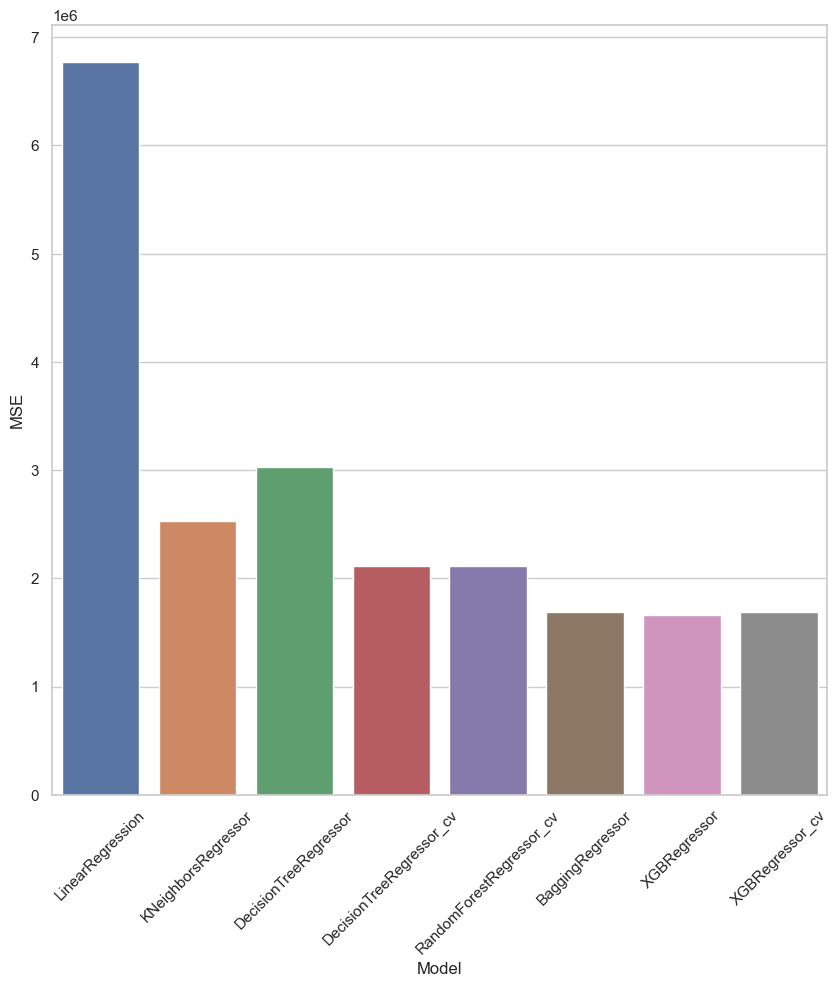

In [135]:
plt.figure(figsize=(10,10))
sns.set(style='whitegrid')
plt.xticks(rotation=45)
sns.barplot(x='Model',y='MSE',data=df,hue='Model')
plt.xlabel('Model')
plt.ylabel('MSE')

Insight-->
    Also here we can see our model well fitted on the right side

Text(0, 0.5, 'r2_score')

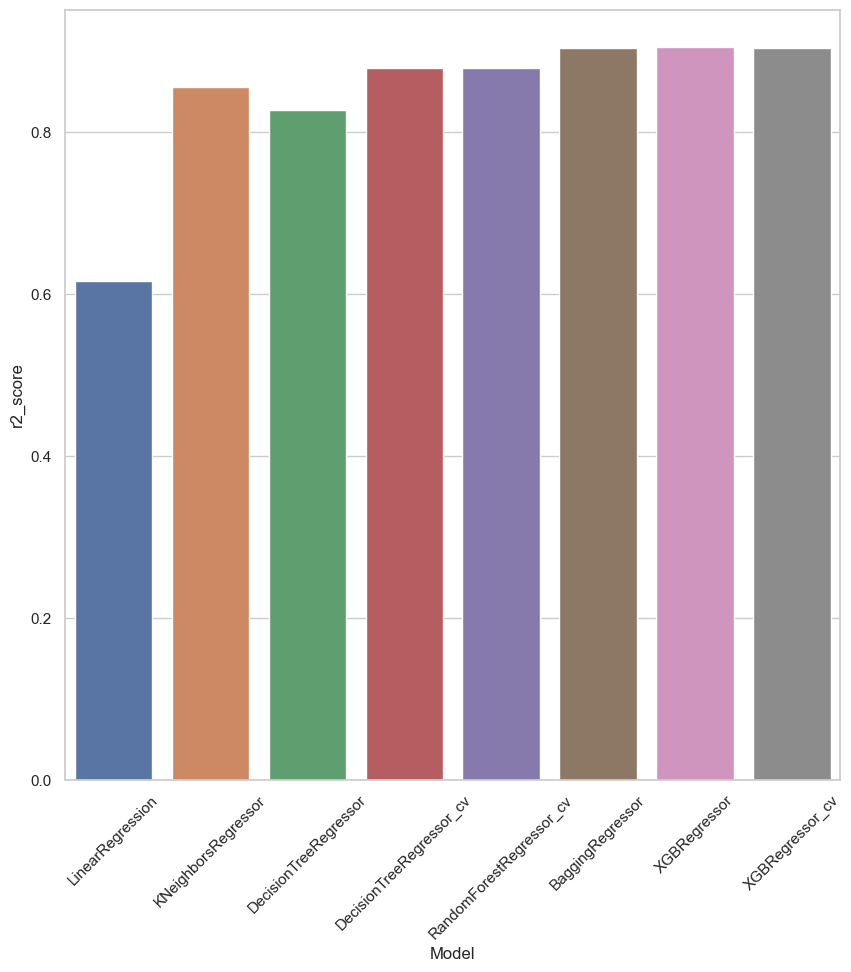

In [134]:
plt.figure(figsize=(10,10))
sns.set(style='whitegrid')
plt.xticks(rotation=45)
sns.barplot(x='Model',y='r2_score',data=df,hue='Model')
plt.xlabel('Model')
plt.ylabel('r2_score')

Insights-->
    Here our liner regression model give us low result but another models are good in r2_score.